In [8]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_934/1082506825.py:2: RuntimeWarning: invalid value encountered in log
  return -1/t*np.log(-y)


(-1.0, 10.0)

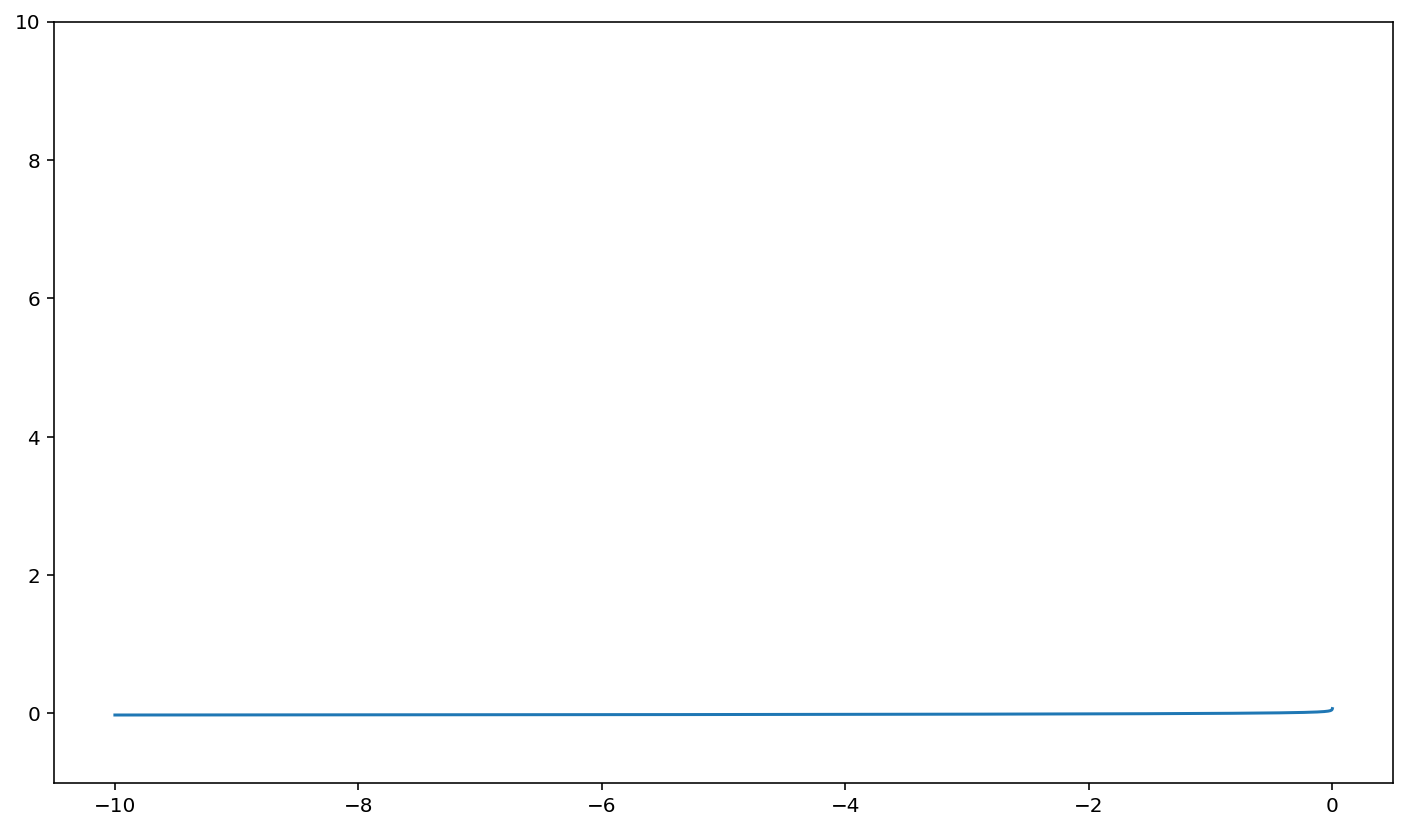

In [21]:
def logBarrier(y,t):
    return -1/t*np.log(-y)
    
y = np.linspace(-10,0.000000001,10001)

fig,ax = plt.subplots()
t = 100
ax.plot(y,logBarrier(y,t))
ax.set_ylim(np.array([-1,10]))

In [22]:
def newtonsEqualityMethod(f,df,d2f,A,x,tol,alpha,beta): # note don't need b, but DO need Ax_0 = b
    k = 0
    decrement = tol + 1
    
    while decrement > tol:
        
        # calculate gradient and hessian at current location
        grad = df(x)
        hess = d2f(x)
        
        # construct block KKT matrix
        KKT = np.block([[hess, np.transpose(A)],
                        [A,np.zeros((A.shape[0],A.shape[0]))]])
        
        KKTrhs = np.concatenate([-grad,np.zeros(A.shape[0])])
        
        # find the descent direction by solving KKT system for (deltaX , w) and then only grab deltaX
        descentDir = np.linalg.solve(KKT,KKTrhs)[0:A.shape[1]]
        
        # backtracking to choose how far to go in the descent direction
        stepsize = 1
        while f(x + stepsize*descentDir) > f(x) + alpha*stepsize*np.dot(descentDir,descentDir):
            stepsize = beta*stepsize
            
        x = x + stepsize*descentDir
        
        decrement = np.dot(descentDir, np.dot(hess,descentDir))
        k += 1
        print(x)
        
    return [x,k]

In [24]:
def newtonsMethod(f,df,d2f,x,tol,alpha,beta):
    i = 0
    decrement = tol + 1
    
    while decrement > tol:
        
        hess = d2f(x)
        grad = df(x)
        
        descentDir = np.linalg.solve(-hess,grad)
        
        stepsize = 1
        
        while f(x+stepsize*descentDir) > f(x)+alpha*stepsize*np.dot(descentDir,descentDir):
            
            stepsize = beta*stepsize
            
        
        x = x + stepsize*descentDir
        i = i+1
        decrement = np.dot(grad,-descentDir)
        
    return [x,i]


def type3solver(f0,f1,f2,df0,df1,df2,d2f0,d2f1,d2f2,x,t,mu,tol1,tol2,alpha,beta):
    iter = 0
    
    
    while 1/t > tol1:
        def logFunc(x):
            return t*f0(x) - np.log(-f1(x)) - np.log(-f2(x))
        
        iter = iter + 1
        
        def d1logFunc(x):
            return t*df0(x)-1/f1(x)*df1(x)-1/f2(x)*df2(x)
            
        def d2logFunc(x):
            return t*d2f0(x) + 1/f1(x)**2*np.outer(df1(x),df1(x)) + 1/f2(x)**2*np.outer(df2(x),df2(x)) - 1/f1(x)*d2f1(x) - 1/f2(x)*d2f2(x)
        
        newtonSolve = newtonsMethod(logFunc,d1logFunc,d2logFunc,x,tol2,alpha,beta)
        
        x = newtonSolve[0]
        t = mu*t
        
    return x


def f0(x):
    return x[0]**2+x[1]**2

def f1(x):
    return (x[0]-1)**2 + (x[1]-1)**2 - 1

def f2(x):
    return (x[0]-1)**2 + (x[1]+1)**2 - 4


def df0(x):
    return np.array([2*x[0],2*x[1]])

def df1(x):
    return np.array([2*(x[0]-1),2*(x[1]-1)])
    
def df2(x):
    return np.array([2*(x[0]-1),2*(x[1]+1)])
    
    
def d2f0(x):
    return np.array([[2,0],[0,2]])

def d2f1(x):
    return np.array([[2,0],[0,2]])

def d2f2(x):
    return np.array([[2,0],[0,2]])




sol = type3solver(f0,f1,f2,df0,df1,df2,df0,d2f1,d2f2,np.array([1,.5]),1,2,1e-8,1e-8,.1,.5)

In [25]:
sol

array([0.29289324, 0.29289323])